# Gradient Descent and Stochastic Gradient Descent

In [1]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt

Given object function $f(x) = x^2$, use $x=10$ as the initial value and $\eta=0.2$.

In [2]:
def gd(eta, epoch = 10):
    x = 10
    results = [x]
    for i in range(epoch):
        x -= eta * 2 * x  # f(x) = x* the derivative of x is f'(x) = 2* x.
        results.append(x)
    print('epoch {}, x:{}'.format(i+1, x))
    return results

res = gd(0.2)

epoch 10, x:0.06046617599999997


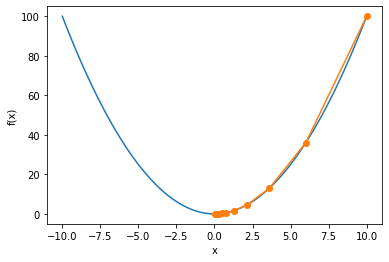

In [3]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    plt.plot(f_line, [x * x for x in f_line])
    plt.plot(res, [x * x for x in res], '-o')
    plt.xlabel('x')
    plt.ylabel('f(x)')

show_trace(res)

## A small Learning Rate


epoch 10, x:3.4867844009999995


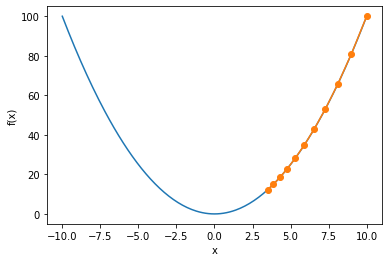

In [4]:
show_trace(gd(0.05))

## A small Learning Rate with more epochs

epoch 30, x:0.4239115827521617


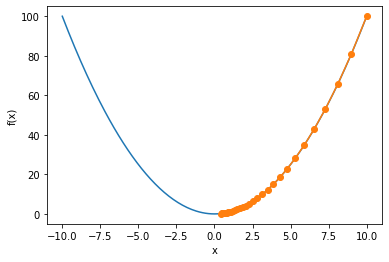

In [5]:
show_trace(gd(0.05, epoch=30))

## A large learning rate 

epoch 10, x:61.917364224000096


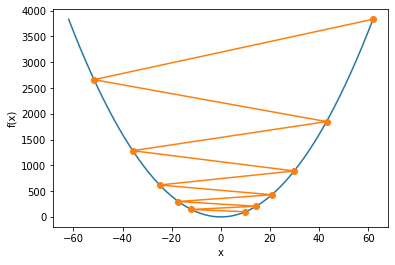

In [6]:
show_trace(gd(1.1))

## A large learning rate with more epochs

epoch 30, x:2373.7631379977083


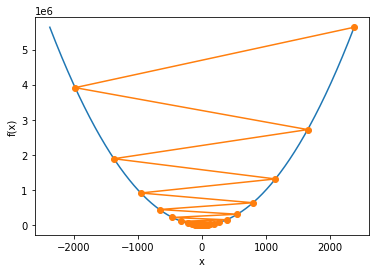

In [7]:
show_trace(gd(1.1, epoch=30))

## Gradient Descent in Multi-Dimensional Space

Given object function $f(\mathbf{x})=x_1^2+2x_2^2$, with (-5, -2) as the initial point. 

In [8]:
def train_2d(trainer):  
    x1, x2, s1, s2 = -5, -2, 0, 0 
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results



A plot function to show the trace.

In [9]:
def show_trace_2d(f, results):  
    plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1), np.arange(-3.0, 1.0, 0.1))
    plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    plt.xlabel('x1')
    plt.ylabel('x2')

A proper learning rate

epoch 20, x1 -0.057646, x2 -0.000073


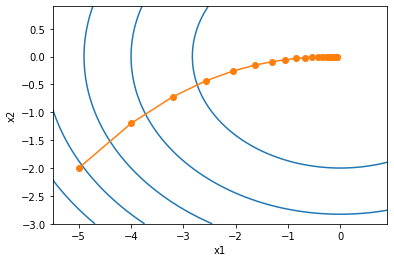

In [10]:
eta = 0.1
def f_2d(x1, x2):  
    return x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)
show_trace_2d(f_2d, train_2d(gd_2d))

## Stochastic Gradient Descent (SGD)

Simulate the gradient noise.

epoch 20, x1 -0.162817, x2 -0.089115


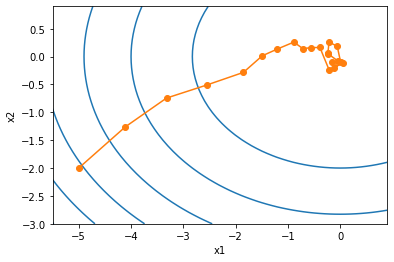

In [11]:
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)), 0, 0)
show_trace_2d(f_2d, train_2d(sgd_2d))